In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# Cleaned dataset
path = r'C:\Users\Tesla Laptops\Desktop\Job planning\Portfolio Project\TNO - Crimes in London\data\raw\M1045_MonthlyCrimeDashboard_TNOCrimeData_cleaned.csv'

In [77]:
df = pd.read_csv(path, parse_dates=['Month_Year', 'Refresh Date'])

In [78]:
df.head()

,Month_Year,Area Type,Borough_SNT,Area name,Area code,Offence Group,Offence Subgroup,Measure,Financial Year,FY_FYIndex,Count,Refresh Date
0,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,BURGLARY,BURGLARY - BUSINESS AND COMMUNITY,Positive Outcomes,fy21-22,21-22_01,1,2025-06-05
1,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,BURGLARY,BURGLARY - RESIDENTIAL,Positive Outcomes,fy21-22,21-22_01,2,2025-06-05
2,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,ARSON AND CRIMINAL DAMAGE,CRIMINAL DAMAGE,Positive Outcomes,fy21-22,21-22_01,13,2025-06-05
3,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,DRUG OFFENCES,TRAFFICKING OF DRUGS,Positive Outcomes,fy21-22,21-22_01,5,2025-06-05
4,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,PUBLIC ORDER OFFENCES,OTHER OFFENCES PUBLIC ORDER,Offences,fy21-22,21-22_01,14,2025-06-05


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791224 entries, 0 to 791223
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Month_Year        791224 non-null  datetime64[ns]
 1   Area Type         791224 non-null  object        
 2   Borough_SNT       791224 non-null  object        
 3   Area name         791224 non-null  object        
 4   Area code         788005 non-null  object        
 5   Offence Group     791224 non-null  object        
 6   Offence Subgroup  791224 non-null  object        
 7   Measure           791224 non-null  object        
 8   Financial Year    791224 non-null  object        
 9   FY_FYIndex        791224 non-null  object        
 10  Count             791224 non-null  int64         
 11  Refresh Date      791224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 72.4+ MB


In [80]:
df.columns

Index(['Month_Year', 'Area Type', 'Borough_SNT', 'Area name', 'Area code',
       'Offence Group', 'Offence Subgroup', 'Measure', 'Financial Year',
       'FY_FYIndex', 'Count', 'Refresh Date'],
      dtype='object')

In [85]:
df.dtypes

Month_Year          datetime64[ns]
Area Type                   object
Borough_SNT                 object
Area name                   object
Area code                   object
Offence Group               object
Offence Subgroup            object
Measure                     object
Financial Year              object
FY_FYIndex                  object
Count                        int64
Refresh Date        datetime64[ns]
dtype: object

In [95]:
# Extracting Day, Month and Year from Month_Year Column
df['Year'] = df['Month_Year'].dt.year
df['Month'] = df['Month_Year'].dt.month
df['day'] = df['Month_Year'].dt.day

df['month_name'] = df['Month_Year'].dt.strftime('%b') # e.g., "Jun"
df['month_year_label'] = df['Month_Year'].dt.strftime('%b %Y') # e.g., "Jun 2021"

In [96]:
df.head()

,Month_Year,Area Type,Borough_SNT,Area name,Area code,Offence Group,Offence Subgroup,Measure,Financial Year,FY_FYIndex,Count,Refresh Date,Year,Month,day,month_name,month_year_label
0,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,BURGLARY,BURGLARY - BUSINESS AND COMMUNITY,Positive Outcomes,fy21-22,21-22_01,1,2025-06-05,2021,6,1,Jun,Jun 2021
1,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,BURGLARY,BURGLARY - RESIDENTIAL,Positive Outcomes,fy21-22,21-22_01,2,2025-06-05,2021,6,1,Jun,Jun 2021
2,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,ARSON AND CRIMINAL DAMAGE,CRIMINAL DAMAGE,Positive Outcomes,fy21-22,21-22_01,13,2025-06-05,2021,6,1,Jun,Jun 2021
3,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,DRUG OFFENCES,TRAFFICKING OF DRUGS,Positive Outcomes,fy21-22,21-22_01,5,2025-06-05,2021,6,1,Jun,Jun 2021
4,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,PUBLIC ORDER OFFENCES,OTHER OFFENCES PUBLIC ORDER,Offences,fy21-22,21-22_01,14,2025-06-05,2021,6,1,Jun,Jun 2021


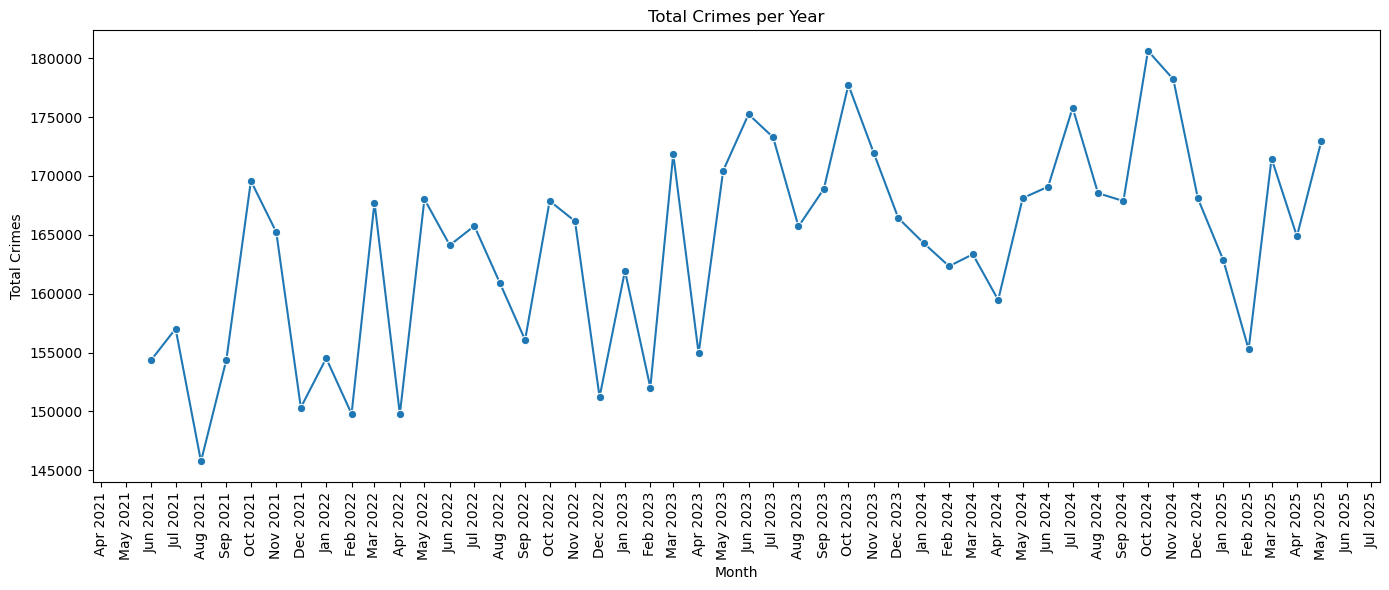

In [135]:
# Count of offences per year

import matplotlib.dates as mdates

monthly = df.groupby('Month_Year')['Count'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly, x='Month_Year', y='Count', marker='o')
plt.title("Total Crimes per Year")
plt.xlabel("Month")
plt.ylabel("Total Crimes")
plt.xticks(rotation=90)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.tight_layout()
plt.show()